In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split


In [3]:
## reading data
data =  pd.read_csv(r'/mnt/d/portfolio/Diabetis_prediction/Data/employee_retention.csv')
data.shape

(14999, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             14999 non-null  int64 
 1   employee_id            14999 non-null  int64 
 2   number_project         14999 non-null  int64 
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   department             14999 non-null  object
 9   salary                 14999 non-null  object
dtypes: int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
data.nunique()

Unnamed: 0               14999
employee_id              14999
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
left                         2
promotion_last_5years        2
department                  10
salary                       3
dtype: int64

In [6]:
data.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [7]:
data.describe()

,Unnamed: 0,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,4329.982679,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.000000,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3749.500000,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7499.000000,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11248.500000,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14998.000000,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
emp_satis_eval = pd.read_csv('/mnt/d/portfolio/Diabetis_prediction/Data/employee_satisfaction_evaluation.csv')

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [9]:
emp_satis_eval.describe()

,EMPLOYEE #,satisfaction_level,last_evaluation
count,14999.000000,14972.000000,14972.000000
mean,45424.627575,0.612830,0.716125
std,25915.900127,0.248714,0.171138
min,1003.000000,0.090000,0.360000
25%,22872.500000,0.440000,0.560000
50%,45448.000000,0.640000,0.720000
75%,67480.500000,0.820000,0.870000
max,99815.000000,1.000000,1.000000


<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

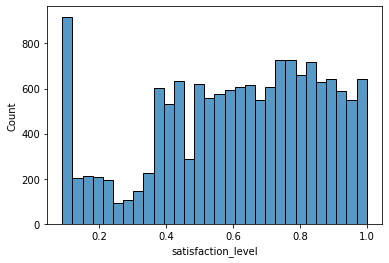

In [10]:
sns.histplot(data=emp_satis_eval,x='satisfaction_level')

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

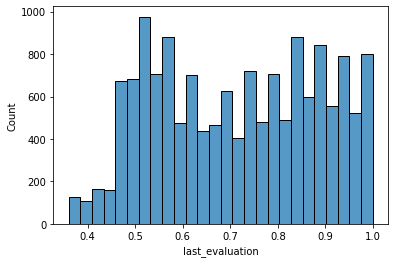

In [11]:
sns.histplot(data=emp_satis_eval,x='last_evaluation')

In [12]:
## filling the missing values with mean as both the column are uniform distributions

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(emp_satis_eval)

transformed_data = imputer.transform(emp_satis_eval)

transformed_data = pd.DataFrame(transformed_data,columns=emp_satis_eval.columns.to_list())


In [13]:
transformed_data.isna().sum()

EMPLOYEE #            0
satisfaction_level    0
last_evaluation       0
dtype: int64

In [14]:
data

,Unnamed: 0,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,1003,2,157,3,0,1,0,sales,low
1,1,1005,5,262,6,0,1,0,sales,medium
2,2,1486,7,272,4,0,1,0,sales,medium
3,3,1038,5,223,5,0,1,0,sales,low
4,4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,14994,87670,2,151,3,0,1,0,support,low
14995,14995,87673,2,160,3,0,1,0,support,low
14996,14996,87679,2,143,3,0,1,0,support,low
14997,14997,87681,6,280,4,0,1,0,support,low


In [15]:
## join two dataframes

data = data.set_index('employee_id').join(transformed_data.set_index('EMPLOYEE #')).reset_index()
data.head()

,employee_id,Unnamed: 0,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,0,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,3,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,4,2,159,3,0,1,0,sales,low,0.37,0.52


## Exploratory Analysis


In [16]:
columns = data.columns.to_list()
cat_cols = data.select_dtypes(include='object').columns.to_list()
ordinal_cols = [x for x in columns if data[x].nunique() < 10 and x not in cat_cols]
num_cols = [x for x in columns if x not in cat_cols and x not in ordinal_cols]

In [17]:
# def draw_plots(column_list):
#         print(column_list)
#         if len(column_list)%2==0:
#             cat_rows_no = len(column_list)//2 
#         else:
#             cat_rows_no = (len(column_list)//2)+1

#         print(cat_rows_no)

#         cat_cols_no = 1

#         width = 15*cat_rows_no
#         height = 5*cat_rows_no
        
#         # Create subplots
#         fig, axes = plt.subplots(cat_rows_no, cat_cols_no, figsize=(width,height))

#         # if cat_rows_no == 1:
#         #     axes = axes[np.newaxis, :]

#         if cat_cols_no == 1:
#             axes = axes[:, np.newaxis]

#         # Flatten the axes array if it's not already flat
#         if not isinstance(axes, np.ndarray):
#             axes = np.array(axes)

#         # Iterate over each column and create a countplot in the corresponding subplot
#         for i, col in enumerate(column_list):
#             row_no = i //2
#             col_no = i % 2
#             sns.countplot(data=data, x=col, ax=axes[row_no, col_no])    # Create countplot in the current subplot
#             axes[row_no, col_no].set_title(col)                         # Set title for the subplot

#         # Adjust layout
#         plt.tight_layout()

#         # Show the plot
#         plt.show()

In [18]:
# def univariate_analysis(data):
#     columns = data.columns.to_list()
#     cat_cols = data.select_dtypes(include='object').columns.to_list()
#     ordinal_cols = [x for x in columns if data[x].nunique() < 10 and x not in cat_cols]
#     num_cols = [x for x in columns if x not in cat_cols and x not in ordinal_cols]


#     draw_plots(cat_cols)
#     draw_plots(ordinal_cols)

    

In [19]:
def draw_countplot(column_name):
    order = data[column_name].value_counts().index
    ax = sns.countplot(data=data,x=column_name,order=order)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.title(column_name)
    plt.show()


<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

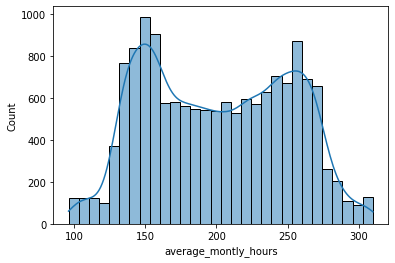

In [20]:
sns.histplot(data=data,x = 'average_montly_hours',kde=True)

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

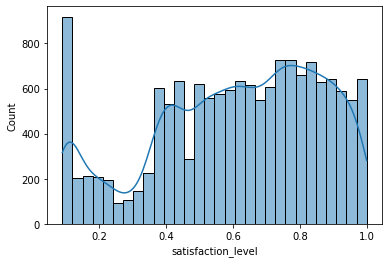

In [21]:
sns.histplot(data=data,x = 'satisfaction_level',kde=True)

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

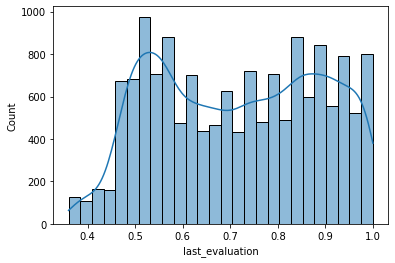

In [22]:
sns.histplot(data=data,x = 'last_evaluation',kde=True)

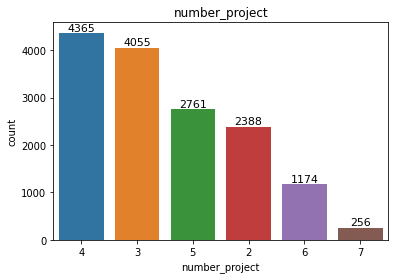

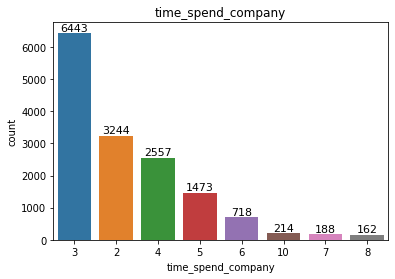

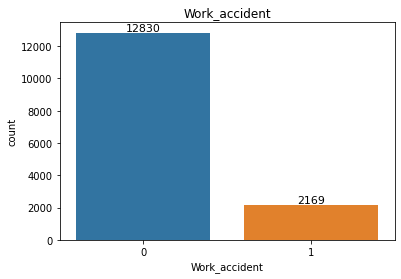

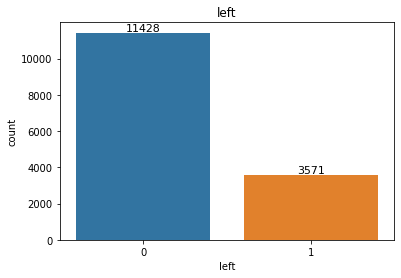

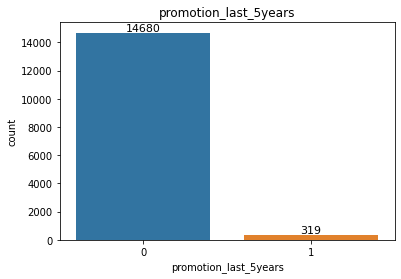

In [23]:
for col in ordinal_cols:
    draw_countplot(col)

From univariate analysis we can see there is a bit class imbalance in target variable but not too extreme

In [24]:
## Bivariate Analysis

def analysis_with_target(column_name):
    left_by_col = data.groupby(column_name)['left'].agg('sum').sort_values(ascending=False)

    plt.figure(figsize=(10, 5))  
    ax = sns.barplot(x=left_by_col.index, y=left_by_col.values, order=left_by_col.index, palette="viridis")
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.xlabel('Department')
    plt.ylabel('Number of Employees Left')
    plt.title('Number of Employees Left by Department')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()

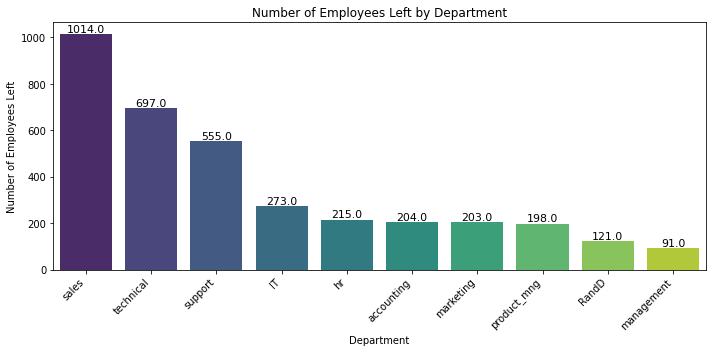

In [25]:
analysis_with_target('department')

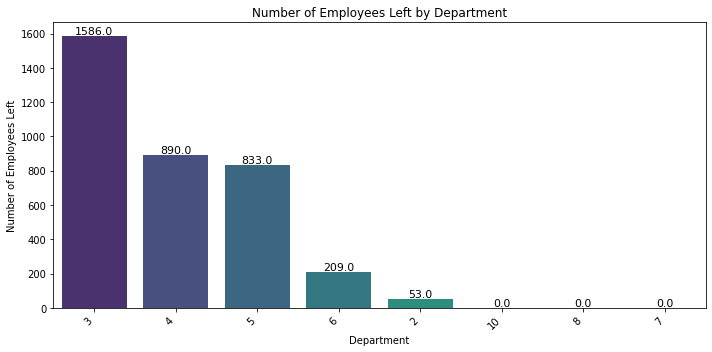

In [26]:
analysis_with_target('time_spend_company')

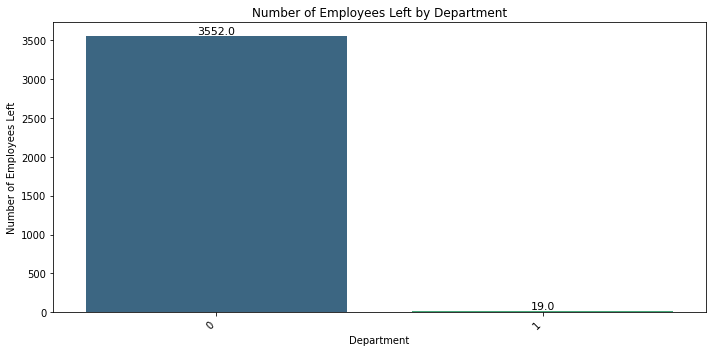

In [27]:
analysis_with_target('promotion_last_5years')

In [28]:
data.groupby('left')['average_montly_hours'].min()

left
0     96
1    126
Name: average_montly_hours, dtype: int64

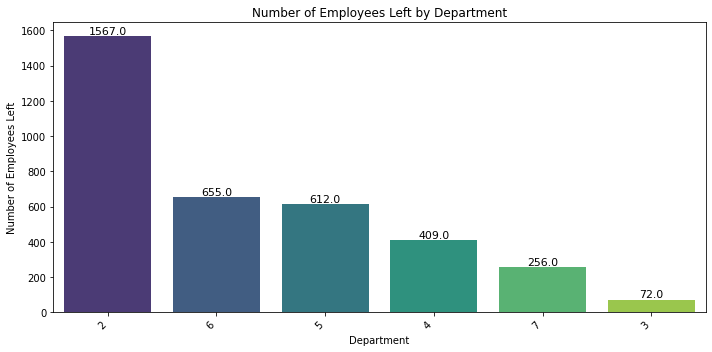

In [29]:
analysis_with_target('number_project')

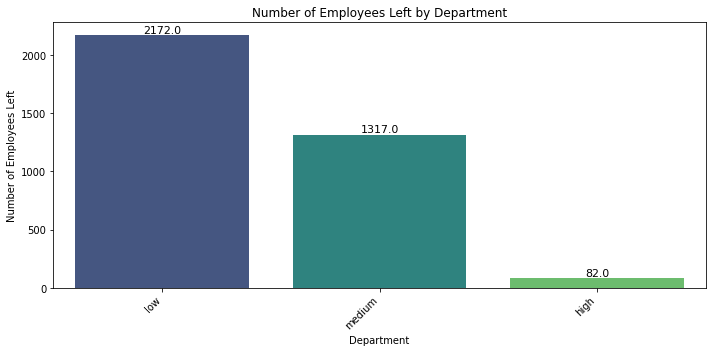

In [30]:
analysis_with_target('salary')

<AxesSubplot:xlabel='salary', ylabel='left'>

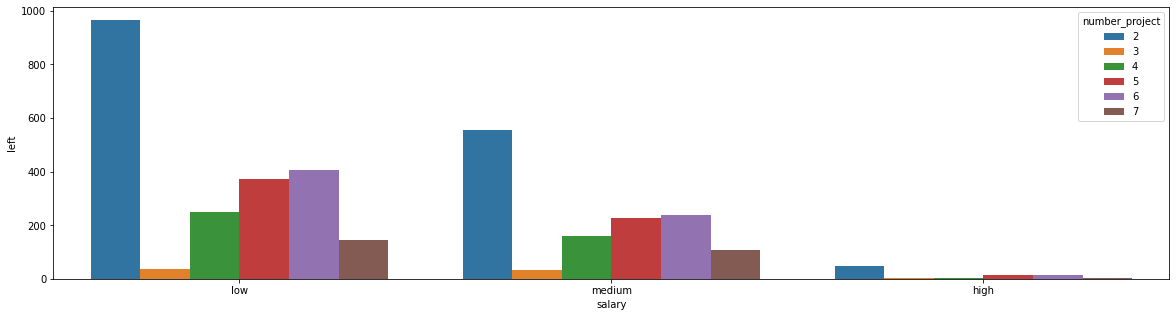

In [31]:
grouped_data = data.groupby(['salary','number_project'])['left'].agg('sum').sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,5))
sns.barplot(data=grouped_data, x='salary', y='left', hue='number_project')

## Data Preparation for modelling

In [32]:
data.reset_index()

,index,employee_id,Unnamed: 0,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,0,1003,0,2,157,3,0,1,0,sales,low,0.38,0.53
1,1,1005,1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,2,1486,2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,3,1038,3,5,223,5,0,1,0,sales,low,0.72,0.87
4,4,1057,4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,87670,14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,14995,87673,14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,14996,87679,14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,14997,87681,14997,6,280,4,0,1,0,support,low,0.11,0.96


In [33]:
X = data.drop(columns = ['Unnamed: 0','employee_id','left'])
Y = data['left']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [36]:
column_transformation = ColumnTransformer([('cat_transformer',OneHotEncoder(drop='first'),['department']),
                                           ('ordinal_encoder',OrdinalEncoder(),['salary']),
                                           ('standardization',StandardScaler(),['average_montly_hours'])],remainder='passthrough')


In [37]:
column_transformation

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_transformer', OneHotEncoder(drop='first'),
                                 ['department']),
                                ('ordinal_encoder', OrdinalEncoder(),
                                 ['salary']),
                                ('standardization', StandardScaler(),
                                 ['average_montly_hours'])])

In [38]:
x_train

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
8265,4,113,6,0,0,sales,medium,0.33,0.62
13190,5,258,2,0,0,IT,medium,0.97,0.63
10196,3,212,3,0,0,technical,medium,0.93,0.81
14289,2,157,3,0,0,sales,low,0.43,0.56
3071,2,188,4,0,0,sales,medium,0.49,0.69
...,...,...,...,...,...,...,...,...,...
3483,4,211,2,0,0,support,low,0.65,0.70
6950,3,231,2,0,0,support,medium,0.74,0.61
3873,3,193,2,0,0,technical,low,0.22,0.64
2526,4,218,4,0,0,sales,medium,0.62,0.49


In [39]:
x_train.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'department', 'salary',
       'satisfaction_level', 'last_evaluation'],
      dtype='object')

In [40]:
x_train_transformed = column_transformation.fit_transform(x_train)
x_test_transformed  = column_transformation.fit_transform(x_test)

<AxesSubplot:>

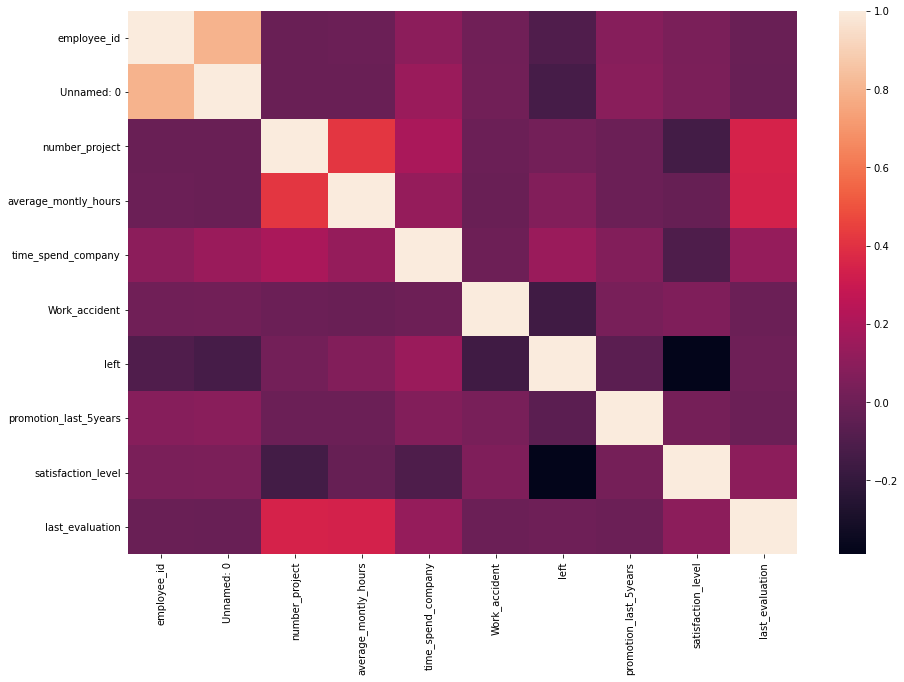

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())

## Model Training

In [41]:
from lazypredict.Supervised import LazyClassifier

In [42]:
# classifier = LazyClassifier(verbose=0)
# models,predictions = classifier.fit(x_train_transformed,x_test_transformed,y_train,y_test)

# print(models)

In [42]:
logistic = LogisticRegression()
logistic.fit(x_train_transformed,y_train)

cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(logistic,x_train_transformed,y_train,scoring='accuracy',cv=cv,n_jobs=-1)

print("cross validation scores:",scores)


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


cross validation scores: [0.76958333 0.75833333 0.77208333 0.76208333 0.77407253]


In [43]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_transformed,y_train)

cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(dtree,x_train_transformed,y_train,scoring='accuracy',cv=cv,n_jobs=-1)

print("cross validation scores:",scores)


cross validation scores: [0.97375    0.96791667 0.98166667 0.97916667 0.97540642]


In [42]:
rtree = RandomForestClassifier()
rtree.fit(x_train_transformed,y_train)

cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rtree,x_train_transformed,y_train,scoring='accuracy',cv=cv,n_jobs=-1)

print("cross validation scores:",scores)


cross validation scores: [0.98833333 0.99125    0.98666667 0.98333333 0.98999583]


In [45]:
gb = GaussianNB()
gb.fit(x_train_transformed,y_train)

cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(gb,x_train_transformed,y_train,scoring='accuracy',cv=cv,n_jobs=-1)

print("cross validation scores:",scores)

cross validation scores: [0.74333333 0.75833333 0.73458333 0.72083333 0.73072113]


In [46]:
svc = SVC()
svc.fit(x_train_transformed,y_train)

cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(svc,x_train_transformed,y_train,scoring='accuracy',cv=cv,n_jobs=-1)

print("cross validation scores:",scores)

cross validation scores: [0.93208333 0.94083333 0.94166667 0.9325     0.94330971]


In [47]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train_transformed,y_train)

cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(adaboost,x_train_transformed,y_train,scoring='accuracy',cv=cv,n_jobs=-1)

print("cross validation scores:",scores)

cross validation scores: [0.95375    0.95166667 0.96083333 0.96333333 0.95873281]


In [48]:
y_pred = rtree.predict(x_test_transformed)
print(accuracy_score(y_pred=y_pred,y_true=y_test))
print(confusion_matrix(y_pred=y_pred,y_true=y_test))

0.9876666666666667
[[2252    5]
 [  32  711]]


In [49]:
y_pred = adaboost.predict(x_test_transformed)
print(accuracy_score(y_pred=y_pred,y_true=y_test))
print(confusion_matrix(y_pred=y_pred,y_true=y_test))

0.958
[[2204   53]
 [  73  670]]


In [43]:
## Finetuning models

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridsearch = GridSearchCV(estimator=rtree,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(x_train_transformed,y_train)

best_params = gridsearch.best_params_
print(best_params)


{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
rtree = RandomForestClassifier(max_depth=20,min_samples_leaf=1,n_estimators=100,min_samples_split=2)
rtree.fit(x_train_transformed,y_train)

cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rtree,x_train_transformed,y_train,scoring='accuracy',cv=cv,n_jobs=-1)

print("cross validation scores:",scores)

cross validation scores: [0.98833333 0.99083333 0.98666667 0.98416667 0.98999583]


In [45]:
y_pred = rtree.predict(x_test_transformed)
print(accuracy_score(y_pred=y_pred,y_true=y_test))
print(confusion_matrix(y_pred=y_pred,y_true=y_test))

0.9896666666666667
[[2287    4]
 [  27  682]]


## Deep Learning

In [58]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [64]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim = 17))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [68]:
batch_size = 10
epochs = 50

history = model.fit(x_train_transformed,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1)

score = model.evaluate(x_test_transformed, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1617 - accuracy: 0.9495
Epoch 2/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1582 - accuracy: 0.9500
Epoch 3/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1583 - accuracy: 0.9500
Epoch 4/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1571 - accuracy: 0.9511
Epoch 5/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1557 - accuracy: 0.9513
Epoch 6/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1552 - accuracy: 0.9513
Epoch 7/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1547 - accuracy: 0.9521
Epoch 8/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1538 - accuracy: 0.9534
Epoch 9/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1537 - accuracy: 0.9523
Epoch 10/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.153

As the random forest classification is giving an accuracy nearly 99 percent we can go with the model than neural networks.

In [78]:
### random predictions
columns = ['number_project', 'average_montly_hours', 'time_spend_company','Work_accident', 'promotion_last_5years', 'department', 'salary','satisfaction_level', 'last_evaluation']

project_number = 2
average_monthly_hours = 157
time_spend_company = 3
Work_accident = 0
promotion_last_5years = 0
department = 'sales'
salary = 'low'
satisfaction_level = 0.38
last_evaluation = 0.53

input_list = [[project_number,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation]]

input = pd.DataFrame(data=input_list,columns=columns)

In [79]:
input_transformed = column_transformation.transform(input)

In [80]:
predicted_value = rtree.predict(input_transformed)
predicted_value

array([1])

In [65]:
rtree.feature_importances_

array([0.00139233, 0.0017515 , 0.00160966, 0.0013784 , 0.00123348,
       0.00113912, 0.00297692, 0.00251358, 0.00342416, 0.01192344,
       0.15974718, 0.1923378 , 0.18194943, 0.00727669, 0.00177229,
       0.30926782, 0.11830621])

### From the feature importance of model we can see leaving is highly dependent on satisfaction level,project number,time_spent_company,department,last_evaluation

In [85]:
data.columns

Index(['employee_id', 'Unnamed: 0', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary', 'satisfaction_level', 'last_evaluation'],
      dtype='object')

In [86]:
## construction model with only these features

X = data.drop(columns = ['Unnamed: 0','employee_id','left','Work_accident','promotion_last_5years','salary'])
Y = data['left']

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
column_transformation = ColumnTransformer([('cat_transformer',OneHotEncoder(drop='first'),['department']),
                                           ('standardization',StandardScaler(),['average_montly_hours'])],remainder='passthrough')



x_train_transformed = column_transformation.fit_transform(x_train)
x_test_transformed  = column_transformation.transform(x_test)

rtree = RandomForestClassifier(max_depth=20,min_samples_leaf=1,n_estimators=100,min_samples_split=2)
rtree.fit(x_train_transformed,y_train)

cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rtree,x_train_transformed,y_train,scoring='accuracy',cv=cv,n_jobs=-1)

print("cross validation scores:",scores)


cross validation scores: [0.98666667 0.99041667 0.98541667 0.99125    0.98541059]


In [90]:
y_pred = rtree.predict(x_test_transformed)
print(accuracy_score(y_pred=y_pred,y_true=y_test))
print(confusion_matrix(y_pred=y_pred,y_true=y_test))

0.9896666666666667
[[2237    2]
 [  29  732]]


### The result remained the same without any improvemnt with decrease in false negatives and increase in false positives